## Self Organizing Maps

Self-organizing maps (SOM) are a class of unsupervised learning neural networks used for feature detection. SOM are used to project a high dimensional data into a smaller set and are used for dimensionality reduction.

SOMs differ from conventional artificial neural networks as they apply competitive learning when compared to error correlated learning, which involves backpropagation and gradient descent. In SOM, the training data has no labels and the map learns to differentiate and distinguish features based on similarities.

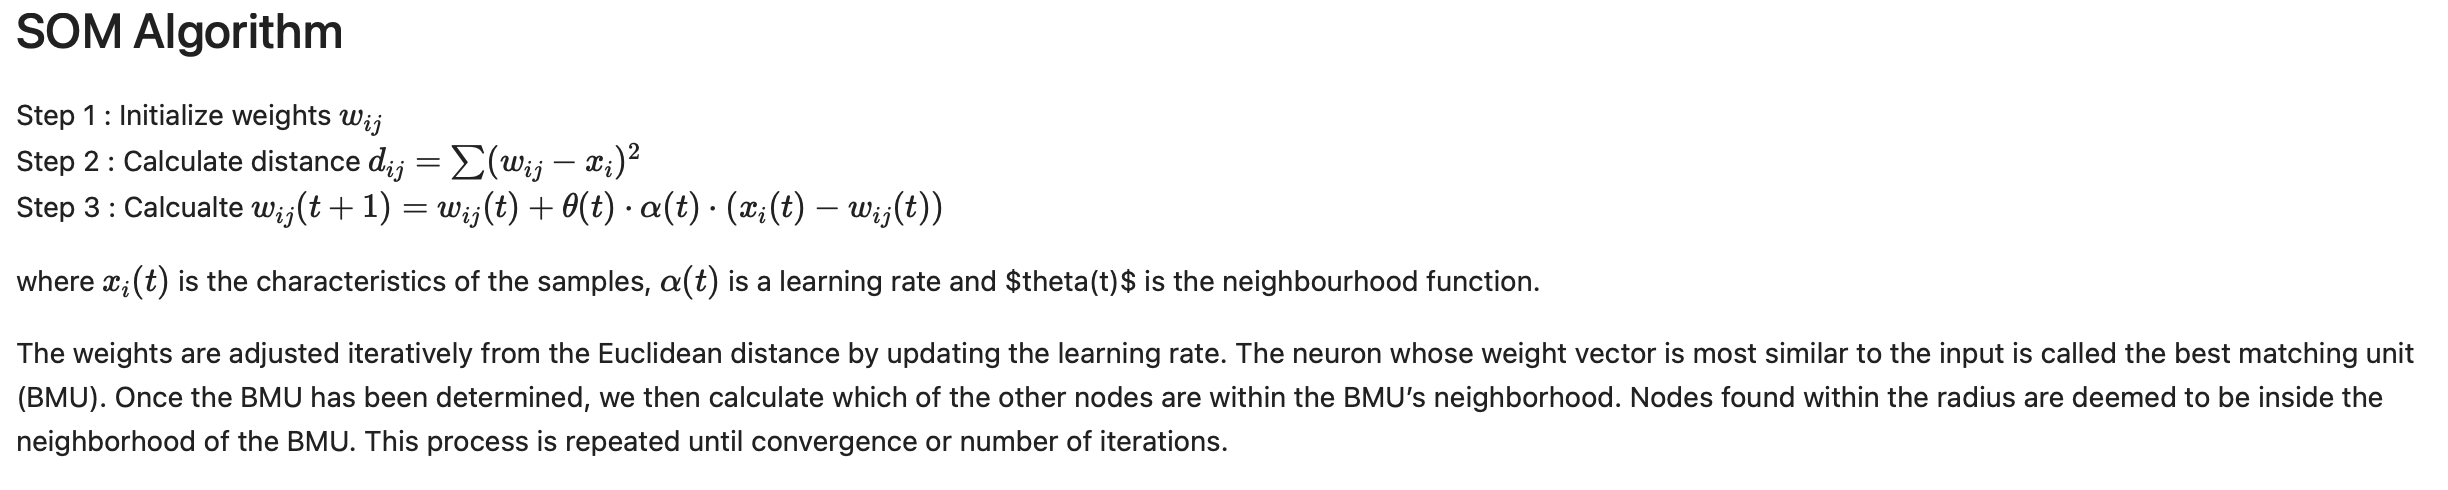


## Implementation

In [1]:
# Import libraries
import pandas as pd
import numpy as np

# SOM & Sklearn library
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler

# Visualization library
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [2]:
# Read cluster file saved locally
df = pd.read_excel('cluster.xlsx', index_col=0)
df

,Cluster,Companies Name,Companies,ATR,CHG
0,0,Verizon Communications,VZ,0.599787,0.002276
1,0,Apple Inc.,AAPL,0.821289,0.005895
2,0,Cisco Systems,CSCO,0.551446,0.002374
3,0,The Coca-Cola Company,KO,0.509103,0.002061
4,0,Intel,INTC,0.739019,0.002997
5,1,Salesforce,CRM,2.424889,0.005376
6,2,Goldman Sachs,GS,3.784343,0.002290
7,3,Visa Inc.,V,1.673837,0.004700
8,3,Microsoft,MSFT,1.477632,0.004499
9,4,3M,MMM,2.134952,0.002377


## Define Feature Matrix

In [3]:
# Define feature matrix
X = df[['ATR', 'CHG']]

# Transfor feature matrix
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.02583954, 0.2223075 ],
       [0.08895445, 1.        ],
       [0.01206523, 0.2432615 ],
       [0.        , 0.1761026 ],
       [0.06551249, 0.37724648],
       [0.54588525, 0.8884971 ],
       [0.93324888, 0.22520798],
       [0.33188014, 0.7431712 ],
       [0.27597328, 0.69985168],
       [0.4632705 , 0.2439911 ],
       [0.28179317, 0.35141614],
       [0.35246041, 0.40239994],
       [0.25071069, 0.44156214],
       [0.24174057, 0.24830459],
       [0.34672914, 0.56664775],
       [0.2858415 , 0.44173607],
       [0.32283589, 0.53961232],
       [0.70943592, 0.84604083],
       [1.        , 0.66672069],
       [0.6401073 , 0.45027831],
       [0.48515095, 0.50201306],
       [0.44193786, 0.        ],
       [0.18818492, 0.2488198 ],
       [0.10638853, 0.1956755 ],
       [0.16680439, 0.67286115],
       [0.16139085, 0.19892231],
       [0.46776334, 0.833803  ],
       [0.1723108 , 0.11645158],
       [0.32249691, 0.13804525]])

## Train SOM

In [6]:
len(X)

29

In [4]:
# Initialize a 15x15 SOM
som = MiniSom(15, 15, 2, learning_rate=0.5, sigma=5, random_seed=42)

# Initialize with randon weights
som.random_weights_init(X)

# Trains SOM with 10000 iterations
som.train_batch(X,10000, verbose=True)

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.021871109605224457


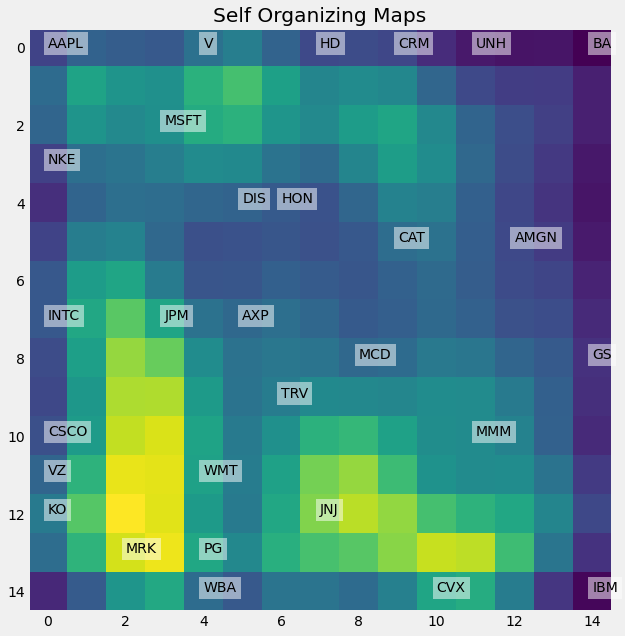

In [5]:
# Plot SOM
plt.figure(figsize=(20, 10))
for ix in range(len(X)):
    winner = som.winner(X[ix])
    plt.text(winner[0], winner[1], df.Companies[ix], bbox=dict(facecolor='white', alpha=0.5, lw=0)) 
plt.imshow(som.distance_map())
plt.grid(False)
plt.title('Self Organizing Maps');

Result of training the SOM with feature set X and labelling it at their respective SOM neurons.

In [9]:
# List the corresponding companies
for ix in range(len(X)):
    winner = som.winner(X[ix])
    print(winner[0], winner[1], df['Companies Name'][ix])

0 11 Verizon Communications
0 0 Apple Inc.
0 10 Cisco Systems
0 12 The Coca-Cola Company
0 7 Intel
9 0 Salesforce
14 8 Goldman Sachs
4 0 Visa Inc.
3 2 Microsoft
11 10 3M
6 9 The Travelers Companies
8 8 McDonald's
3 7 JPMorgan Chase
7 12 Johnson & Johnson
6 4 Honeywell
5 7 American Express
5 4 The Walt Disney Company
11 0 UnitedHealth Group
14 0 Boeing
12 5 Amgen
9 5 Caterpillar Inc.
14 14 IBM
4 11 Walmart
2 13 Merck & Co.
0 3 Nike, Inc.
4 13 Procter & Gamble
7 0 The Home Depot
4 14 Walgreens Boots Alliance
10 14 Chevron Corporation


Reference
https://github.com/JustGlowing/minisom


Loading Iris data into memory 

Constructing a 30x30 SOM from the iris data
step =  0
step =  500
step =  1000
step =  1500
step =  2000
step =  2500
step =  3000
step =  3500
step =  4000
step =  4500
SOM construction complete 

Constructing U-Matrix from SOM
U-Matrix constructed 



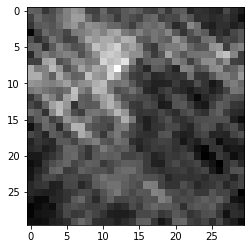

Associating each data label to one map node 


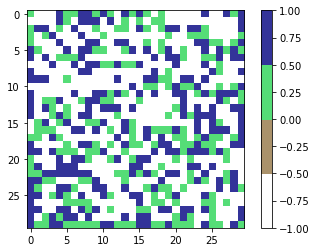

In [13]:
# som_iris.py
# SOM for Iris dataset
# Anaconda3 5.2.0 (Python 3.6.5)

# ==================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# note: if this fails, try >pip uninstall matplotlib
# and then >pip install matplotlib

def closest_node(data, t, map, m_rows, m_cols):
  # (row,col) of map node closest to data[t]
  result = (0,0)
  small_dist = 1.0e20
  for i in range(m_rows):
    for j in range(m_cols):
      ed = euc_dist(map[i][j], data[t])
      if ed < small_dist:
        small_dist = ed
        result = (i, j)
  return result

def euc_dist(v1, v2):
  return np.linalg.norm(v1 - v2) 

def manhattan_dist(r1, c1, r2, c2):
  return np.abs(r1-r2) + np.abs(c1-c2)

def most_common(lst, n):
  # lst is a list of values 0 . . n
  if len(lst) == 0: return -1
  counts = np.zeros(shape=n, dtype=np.int)
  for i in range(len(lst)):
    counts[lst[i]] += 1
  return np.argmax(counts)

# ==================================================================

def main():
  # 0. get started
  np.random.seed(1)
  Dim = 31
  Rows = 30; Cols = 30
  RangeMax = Rows + Cols
  LearnMax = 0.5
  StepsMax = 5000

  # 1. load data
  print("\nLoading Iris data into memory \n")

  dataset = pd.read_csv('JPM.csv')
  dataset = dataset.set_index('Date')

  data_x = dataset.loc[:, dataset.columns != 'Target'].values
  data_y = dataset['Target'].values
  # option: normalize data  

  # 2. construct the SOM
  print("Constructing a 30x30 SOM from the iris data")
  map = np.random.random_sample(size=(Rows,Cols,Dim))
  for s in range(StepsMax):
    if s % (StepsMax/10) == 0: print("step = ", str(s))
    pct_left = 1.0 - ((s * 1.0) / StepsMax)
    curr_range = (int)(pct_left * RangeMax)
    curr_rate = pct_left * LearnMax

    t = np.random.randint(len(data_x))
    (bmu_row, bmu_col) = closest_node(data_x, t, map, Rows, Cols)
    for i in range(Rows):
      for j in range(Cols):
        if manhattan_dist(bmu_row, bmu_col, i, j) < curr_range:
          map[i][j] = map[i][j] + curr_rate * \
(data_x[t] - map[i][j])
  print("SOM construction complete \n")

  # 3. construct U-Matrix
  print("Constructing U-Matrix from SOM")
  u_matrix = np.zeros(shape=(Rows,Cols), dtype=np.float64)
  for i in range(Rows):
    for j in range(Cols):
      v = map[i][j]  # a vector 
      sum_dists = 0.0; ct = 0
     
      if i-1 >= 0:    # above
        sum_dists += euc_dist(v, map[i-1][j]); ct += 1
      if i+1 <= Rows-1:   # below
        sum_dists += euc_dist(v, map[i+1][j]); ct += 1
      if j-1 >= 0:   # left
        sum_dists += euc_dist(v, map[i][j-1]); ct += 1
      if j+1 <= Cols-1:   # right
        sum_dists += euc_dist(v, map[i][j+1]); ct += 1
      
      u_matrix[i][j] = sum_dists / ct
  print("U-Matrix constructed \n")

  # display U-Matrix
  plt.imshow(u_matrix, cmap='gray')  # black = close = clusters
  plt.show()

  # 4. because the data has labels, another possible visualization:
  # associate each data label with a map node
  print("Associating each data label to one map node ")
  mapping = np.empty(shape=(Rows,Cols), dtype=object)
  for i in range(Rows):
    for j in range(Cols):
      mapping[i][j] = []

  for t in range(len(data_x)):
    (m_row, m_col) = closest_node(data_x, t, map, Rows, Cols)
    mapping[m_row][m_col].append(data_y[t])

  label_map = np.zeros(shape=(Rows,Cols), dtype=np.int)
  for i in range(Rows):
    for j in range(Cols):
      label_map[i][j] = most_common(mapping[i][j], 3)
 
  plt.imshow(label_map, cmap=plt.cm.get_cmap('terrain_r', 4))
  plt.colorbar()
  plt.show()

# ==================================================================

if __name__=="__main__":
  main()
